In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import seaborn as sns

# Partia drugiego wyboru

## List of files

In [2]:
path = 'dane_pdf/analiza_elektoratu/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2001_06.csv',
 '2001_07.csv',
 '2004_02.csv',
 '2004_05.csv',
 '2004_06.csv',
 '2004_08.csv',
 '2007_02.csv',
 '2007_09.csv',
 '2009_05.csv',
 '2011_06.csv',
 '2011_07.csv',
 '2011_10.csv',
 '2011_11.csv',
 '2013_07.csv',
 '2015_08.csv',
 '2015_09.csv',
 '2017_04.csv',
 '2017_10.csv',
 '2019_03.csv',
 '2019_09.csv',
 '2019_10.csv']

### List of pandas DF

### Edit DF

In [5]:
if False:
    pd_list = [(lambda x: pd.read_csv(path+x,index_col=0, header=0).T)(f) for f in files]
    
    val = 100
    for pi, pl in enumerate(pd_list):
        pl.index = [ind.replace('*','').replace('\r','').replace('\n','').replace('- ','').replace('+ ','+').replace(' +','+')  for ind in pl.index]
        pl.columns = [ind.replace('*','').replace('\r','').replace('\n','').replace('+ ','+').replace(' +','+') for ind in pl.columns]

        pl[pl == '-'] = 0
        pl = pl.fillna(0)
        f = 0
        rows = pl.index.values.tolist()
        cols = pl.columns.values.tolist()
        for r_org in rows:
            for c in cols:
                #val = pl.loc[r_org,:].astype(str).astype(int).nlargest(2)[1] * 1.5
                #val = int(val)
                r = r_org
                r2 = 'error'

                c_split = c.split(' ')
                c_computed = ''
                if '(' in r:
                    r, r2 = r.split('(')[:2]
                    r = r.lstrip()
                    r2 = r2.lstrip().replace(')','').rstrip()
                elif r_org[-len('Kukiza'):] == 'Kukiza': r = "KUKIZ"

                if len(c_split) >= len(r):
                    for ri in range(len(r)):
                        c_computed = c_computed + c_split[ri][0]
                if c == 'Platforma Obywatelska RP': c_computed = 'PO RP'
                elif c[:len('Prawo i Sprawiedliwość')] == 'Prawo i Sprawiedliwość': c_computed = 'PiS'

                if 'SLD+TR+PPS+UP+Zieloni' in r_org and 'SLD+TR+PPS+UP+Zieloni' in c: r2 = 'SLD+TR+PPS+UP+Zieloni'
                elif 'Prawo i Sprawiedliwość' in c and 'PiS' in r_org: r2 = 'Prawo i Sprawiedliwość'

                if ((r in c+c_computed) or (r_org in c_computed+c) or (r2 in c_computed+c)):
                    if r_org in rows: 
                        pl.loc[r_org,c] = val
                        #del pl[c]
                    elif r in rows: 
                        pl.loc[r,c] = val
                        #del pl[c]
                    f += 1

        print(pi,f,pl.index.shape, end = ' ')
        if np.abs(f - pl.index.shape[0]) > 1: print('WRONG', end = '\n')
        else: print()

        pd_list[pi] = pl
        #added no main
        pl.to_csv(path+'clean/no_main_'+files[pi])
else:
    pd_list = [(lambda x: pd.read_csv(path+'clean/no_main_'+x,index_col=0, header=0))(f) for f in files]

In [6]:
pd_list[0]

,AWSP,ChD III RP,PiS,LR,PO,PPS,PSL,PUG,PdP,RKN,„Samoobrona”,SLD+UP+KPEiR,UW,Inna,Nie ma takiej partii,Trudno powiedzieć
AWSP,100,6,13,0,26,0,6,0,0,0,0,7,8,0,12,22
PiS,11,4,100,4,26,0,9,0,3,4,3,9,2,3,14,8
PO,17,4,19,0,100,2,10,1,0,0,3,10,18,0,10,6
PSL,3,0,7,1,12,0,100,0,4,0,5,49,0,0,10,8
SLD+UP+KPEiR,1,0,6,0,21,2,22,1,0,0,2,100,9,0,26,10


# Opinie elektoratu

In [2]:
path = 'dane_pdf/charaktetyryka_pogladow/'
files = list(filter(lambda x: os.path.isfile(path+x), os.listdir(path)))
files.sort()
files

['2005_percent.csv',
 '2005_points.csv',
 '2007_percent.csv',
 '2007_points.csv',
 '2011_percent.csv',
 '2011_points.csv',
 '2015_percent.csv',
 '2015_points.csv',
 '2019_percent.csv',
 '2019_points.csv']

In [5]:
op_list = [(lambda x: pd.read_csv(path+f,index_col=0, header=0).T)(f) for f in files]

In [6]:
years = ['2005','2007','2011','2015','2019']

Variance ratio: [0.62930625 0.21650729 0.06272309] Total var: 0.8458135444080288
Variance ratio: [0.87599901 0.10093487 0.02306612] Total var: 0.9769338839489887
Variance ratio: [0.79888724 0.16355621 0.03755655] Total var: 0.9624434524002206
Variance ratio: [0.53071788 0.36459499 0.08359125] Total var: 0.8953128726470134
Variance ratio: [0.8621703  0.10061165 0.02352837] Total var: 0.9627819444345193


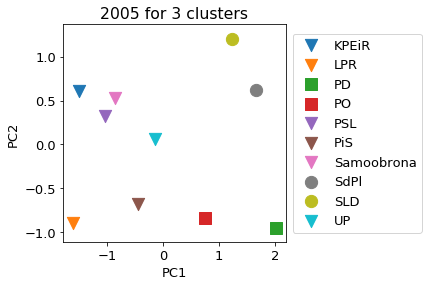

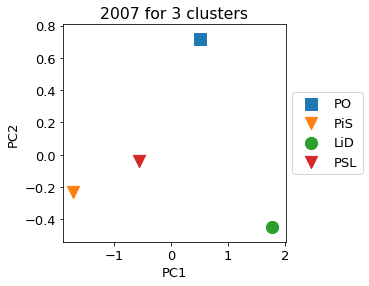

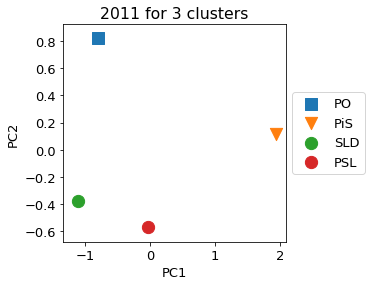

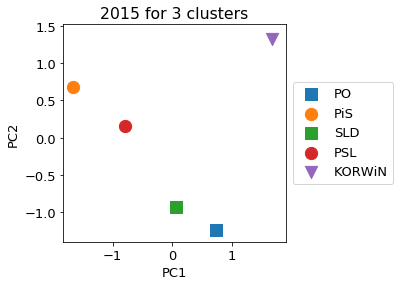

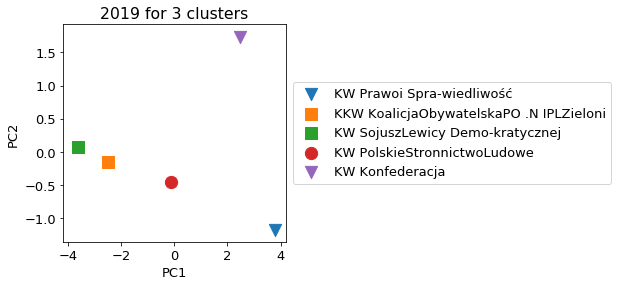

In [12]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    print('Variance ratio:', pca.explained_variance_ratio_, 'Total var:', np.sum(pca.explained_variance_ratio_[:2]))
    #print('Components ratio:', pca.components_.T)
    
    parties_Kmeans = KMeans(n_clusters=3)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(op_list[inx].shape[0]):
        m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, s = 150)
    
    plt.title(years[inx//2]+' for 3 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()

Variance ratio: [0.62930625 0.21650729 0.06272309]
Variance ratio: [0.87599901 0.10093487 0.02306612]
Variance ratio: [0.79888724 0.16355621 0.03755655]
Variance ratio: [0.53071788 0.36459499 0.08359125]
Variance ratio: [0.8621703  0.10061165 0.02352837]


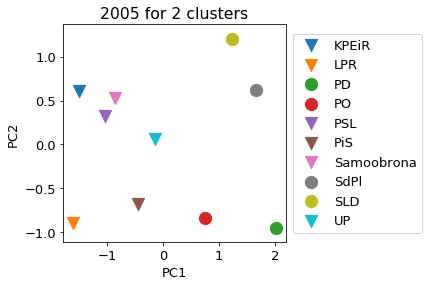

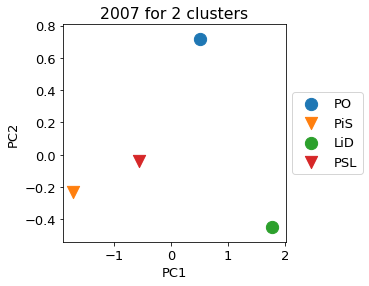

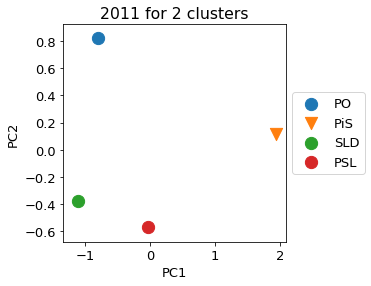

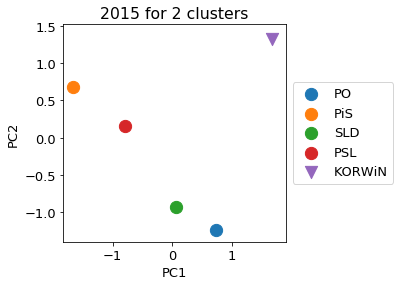

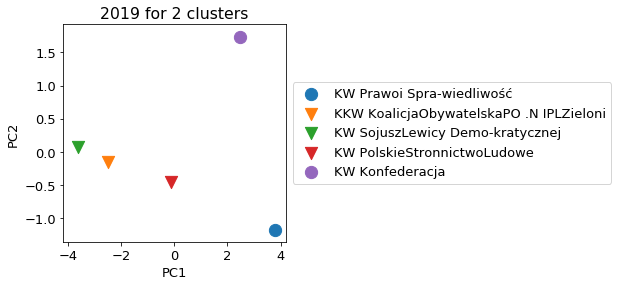

In [40]:
for inx in np.arange(1,len(op_list),2):
    pca = PCA(n_components=3)
    pca.fit(op_list[inx])
    
    X_pca=pca.transform(op_list[inx]) 
    print('Variance ratio:', pca.explained_variance_ratio_)
    
    parties_Kmeans = KMeans(n_clusters=2)
    parties_Kmeans = parties_Kmeans.fit(op_list[inx])
    
    embedding = MDS(n_components=2)
    MDS_parties = embedding.fit_transform(op_list[inx])
    
    mm = ['o', 'v' ,'s']
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 13})
    
    for i in range(op_list[inx].shape[0]):
        m = mm[parties_Kmeans.labels_[i]]
        #plt.scatter(MDS_parties[i,1],MDS_parties[i,1], marker=m, s = 150)
        plt.scatter(X_pca[i,0],X_pca[i,1], marker=m, s = 150)
    
    plt.title(years[inx//2]+' for 2 clusters')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(op_list[inx].index.values.tolist( ), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()

# Sondaże

In [32]:
pool_df = pd.read_csv('dane_pdf/sondaze/Pools_poland.csv', index_col=0, header=0)

In [33]:
pool_df = pool_df.fillna(0)
pool_df = pool_df.replace(['-'], 0)

In [34]:
for c in pool_df.columns:
    pool_df[c] = pd.to_numeric(pool_df[c])
    pool_df[c][:-1] = pool_df[c][:-1].apply(lambda x: x*pool_df[c][-1]/100 if pool_df[c][-1] > 0 else x)

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


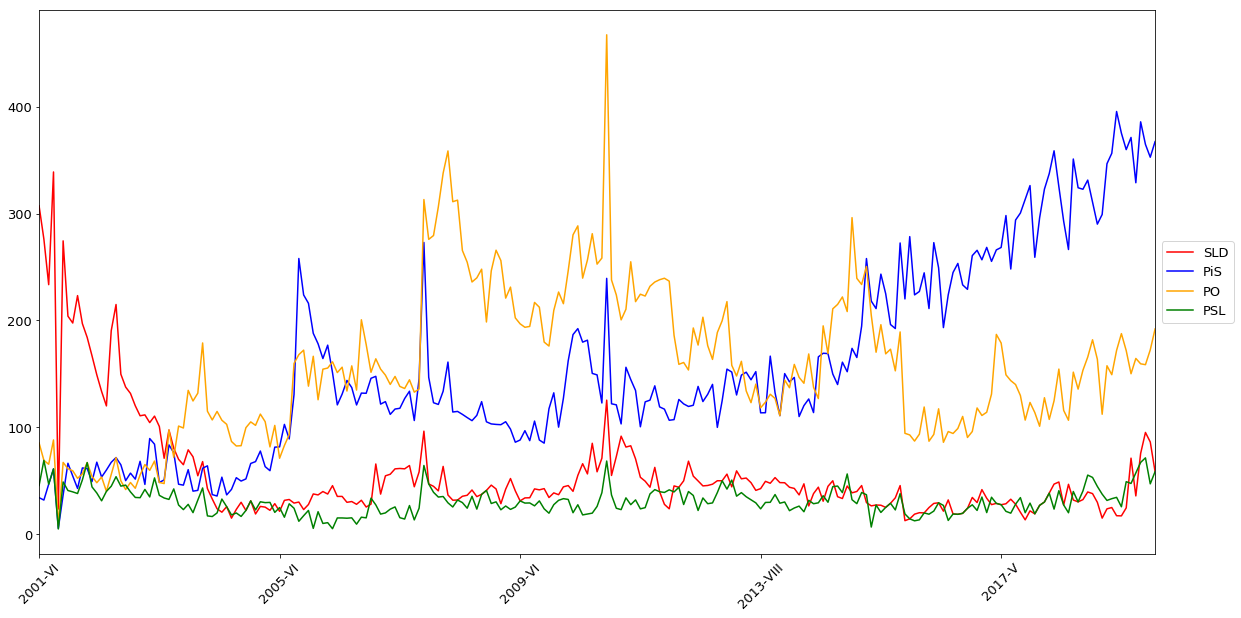

In [112]:
color=['r','b','orange','g']
pool_df.loc[:,pool_df.loc['PiS']>0].T[['SLD','PiS','PO','PSL']].plot(color=color, figsize=(20,10))
plt.legend(['SLD','PiS','PO','PSL'], loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xticks(rotation=45)
plt.show()